**Comparing the performance of three ML models: K-nearest neighbours (KNN), decision trees, and random forest, using the Breast Cancer dataset from sklearn**

This repository works on the Breast Cancer dataset from sklearn. 
1. Load and preprocess the dataset, including feature scaling.
2. Train and evaluate each model using metrics such as accuracy, precision, recall, and F1-score for each model.
3. Explore the impact of hyperparameter tuning on model performance.

   
First of all, let's import the libraries.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import preprocessing #for preprocessing the datasets
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


Let's create function to test the performance metrics
Here are four performance matrices
1. Accuracy
2. Precision
3. Recall
4. F1-score

In [65]:
def evaluate_model(model,X_test, y_test):
    predict=model.predict(X_test)
    accuracy= metrics.accuracy_score(y_test, predict)
    precision= metrics.precision_score(y_test, predict)
    recall= metrics.recall_score(y_test, predict)
    f1=metrics.f1_score(y_test,predict)
    cm= metrics.confusion_matrix(y_test,predict)
    
    # print (f"{model}")
    # print(f"Accuracy: {accuracy}")
    # print(f"Precision: {precision}")
    # print(f"Recall: {recall}")
    # print(f"F1-score: {f1}")
    # print(cm)

    return accuracy, precision, recall, f1, cm

Creating a dictionary to store results for KNN, Decision Tree and Random Forest

In [66]:
# Initialize an empty DataFrame for storing results
columns = ["Model", "Hyperparameterization", "Accuracy", "Precision", "Recall", "F1-score"]
df_results_overall = pd.DataFrame(columns=columns)

# Function to add a row to the results DataFrame
def add_results(model_name, hyperparam_status, accuracy, precision, recall, f1):
    global df_results_overall
    new_row = pd.DataFrame([{
        "Model": model_name,
        "Hyperparameterization": hyperparam_status,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }])
    df_results_overall = pd.concat([df_results_overall, new_row], ignore_index=True)

Accessing the dataset from sklearn

In [67]:
X,y=load_breast_cancer(return_X_y=True)

In [68]:
X,y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Let's analyze the dataset by examining its statistical summary and visualizing feature distributions using matplotlib.pyplot.

In [69]:
print("Type of X:", type(X))
print("Shape of X:", X.shape)
print("Type of y:", type(y))
print("Unique values in y (classes):", set(y))


Type of X: <class 'numpy.ndarray'>
Shape of X: (569, 30)
Type of y: <class 'numpy.ndarray'>
Unique values in y (classes): {0, 1}


In [70]:
import pandas as pd

# Convert to DataFrame for better visualization
df = pd.DataFrame(X)
summary_stats = df.describe()
print(summary_stats)

               0           1           2            3           4   \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

               5           6           7           8           9   ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.104341    0.088799    0.048919    0.181162    0.062798  ...   
std      0.052813    0.079720    0.038803    0.027414    0.007060  ...   
min      0.019380    0.000000    0.000000    0.106000    0.049960  ...   

The describe() function confirms the presence of 30 features. Now, let's visualize their distribution.

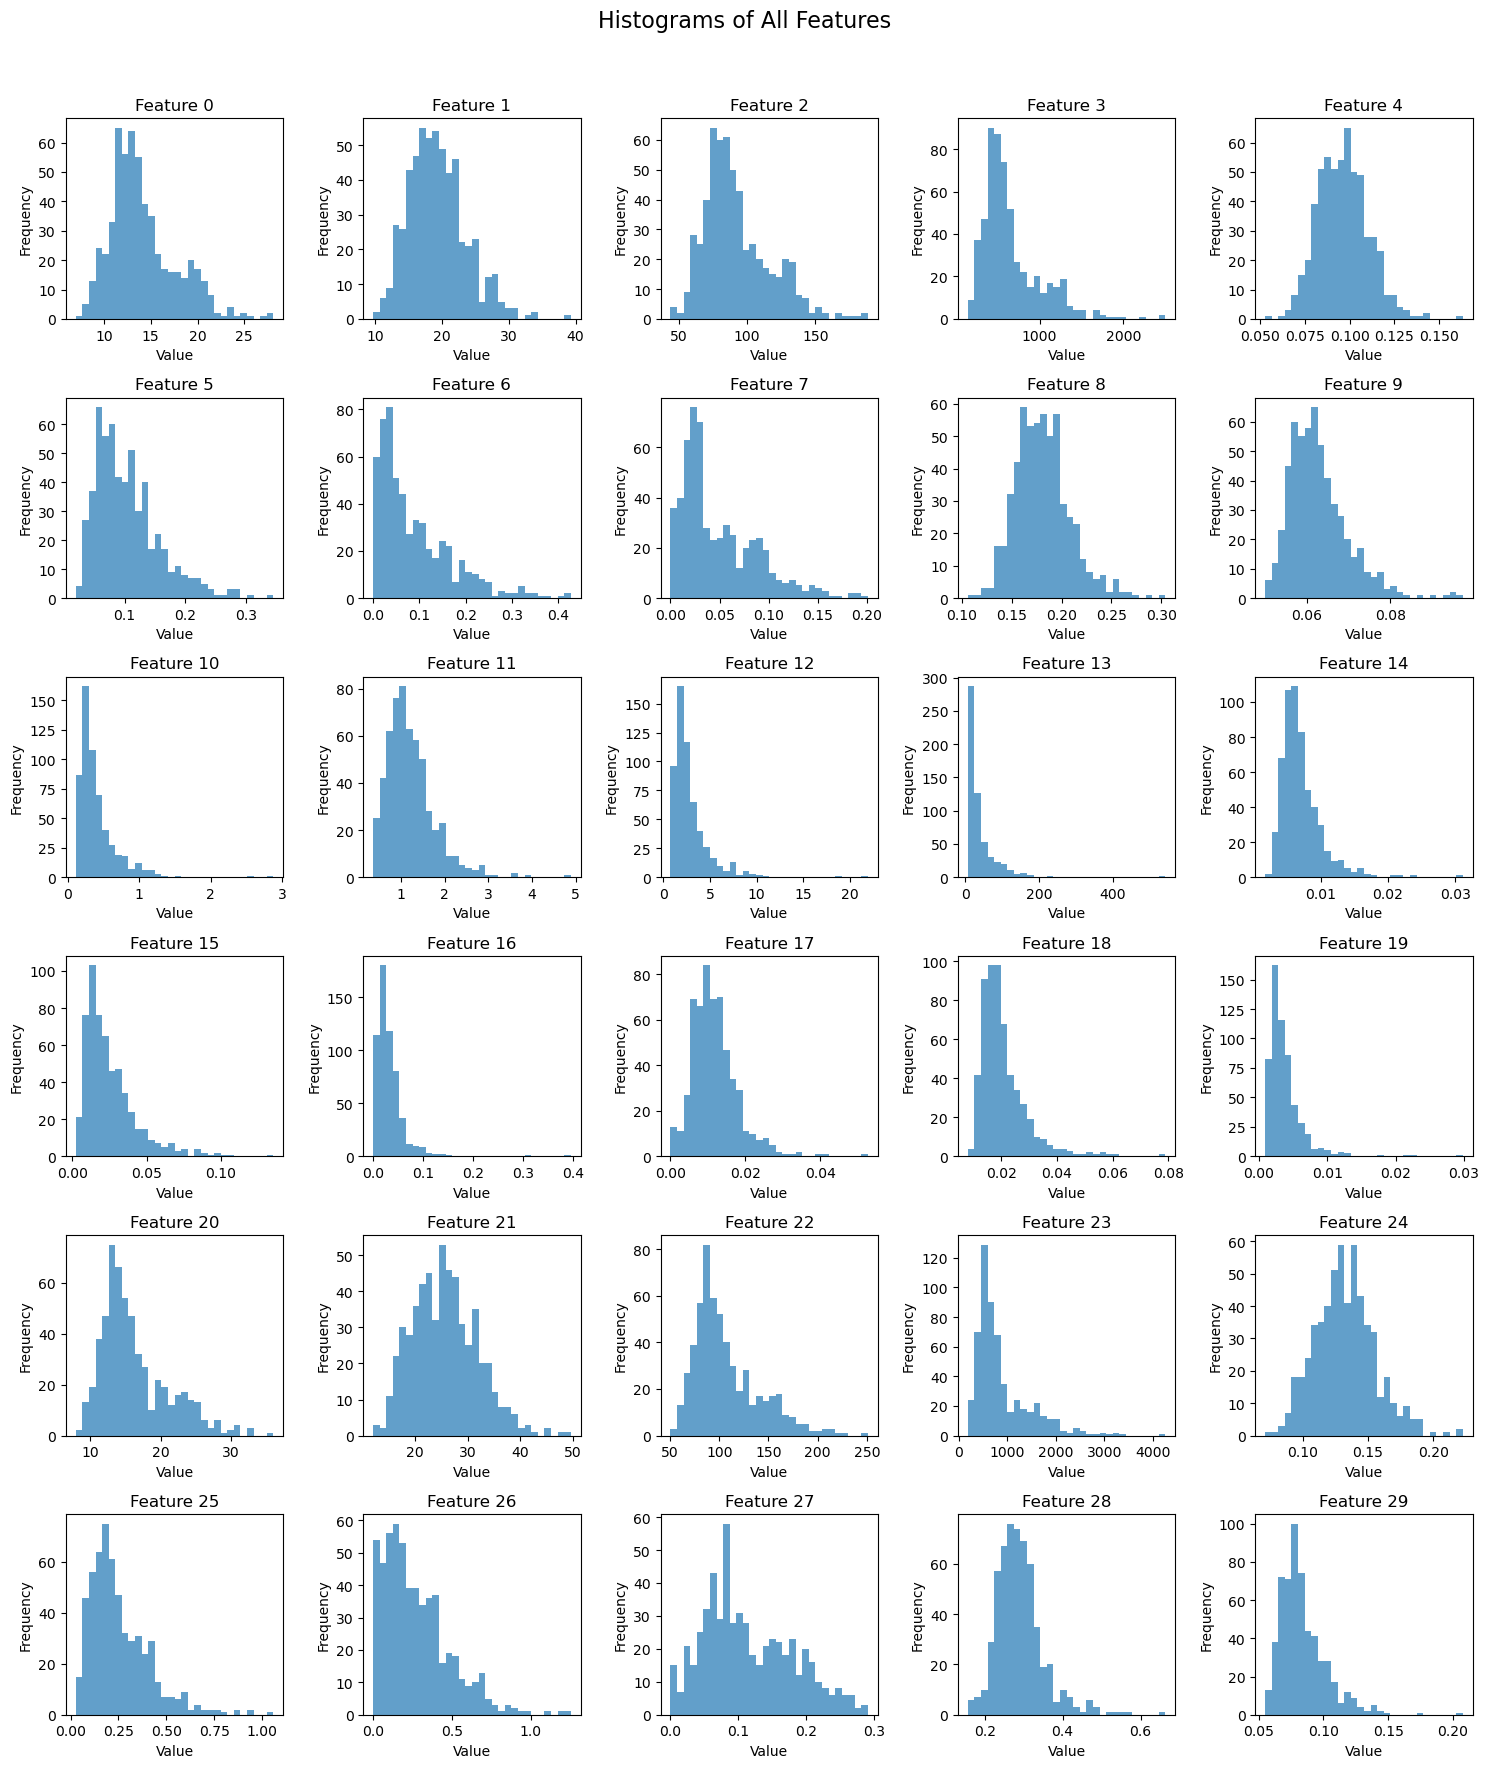

In [71]:
num_features = X.shape[1]  
rows = 6 
cols = 5  

fig, axes = plt.subplots(rows, cols, figsize=(15, 18))
fig.suptitle("Histograms of All Features", fontsize=16)

for i in range(num_features):
    row = i // cols
    col = i % cols
    axes[row, col].hist(X[:, i], bins=30, alpha=0.7)
    axes[row, col].set_title(f"Feature {i}")
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Let's build heatmap using seaborn to compute and visualize the correlation matrix for the 30 features of the dataset.

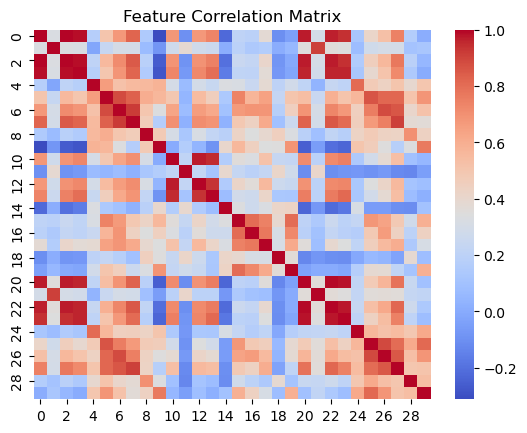

In [72]:
import seaborn as sns

correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


The Feature Correlation Matrix provides valuable insights into the relationships between different features in the dataset. This heatmap visually represents the correlation coefficients, where values range from -1 to 1. 

Let's compute the class distribution in the target variable y to check if the dataset is balanced or imbalanced.

In [73]:
unique, counts = np.unique(y, return_counts=True)
print("Class Distribution:", dict(zip(unique, counts)))


Class Distribution: {0: 212, 1: 357}


The class Distribution shows {0: 212, 1: 357}. This indicates the number of samples belonging to each class in the target variable y.
Class 0 (Benign cases): 212 samples
Class 1 (Malignant cases): 357 samples

In [74]:
# Splitting the dataset into training and testing sets
# X_train, X_test: Feature matrices for training and testing
# y_train, y_test: Corresponding target values for training and testing
# test_size=0.20: Allocates 20% of the data for testing and 80% for training
# random_state=42: Ensures reproducibility of the split by setting a fixed seed
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [75]:
# Standardizing the training data using StandardScaler
# StandardScaler() scales features to have a mean of 0 and a standard deviation of 1
scaler= preprocessing.StandardScaler().fit(X_train) #Fit the scaler to training data
X_train_scaled=scaler.transform(X_train) #Transform the training data from fitted scaler

Let's standardize the test data using same scaler. This ensures thata the test data follows the same distribution as the training data, preventing data leakage.

In [76]:
# Standardizing the test data using the same scaler fitted on the training data
X_test_scaled=scaler.transform(X_test) # Apply the trained scaler to the test set

**KNN neighboursclassifier**

In [77]:
# Initializing the k-Nearest Neighbors (k-NN) classifier
# n_neighbors=5: The model considers the 5 closest neighbors to classify a new data point
knn=neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train) # Training the k-NN classifier on the standardized training data

KNeighborsClassifier()

In [78]:
# Evaluating the trained k-NN model on the test dataset
accuracy, precision, recall, f1, cm=evaluate_model(knn, X_test_scaled, y_test)
# Displaying the evaluation results
print ("KNN without Hyperparameterization")
print(f"Accuracy: {accuracy:.4f}")     # Overall correctness of the model
print(f"Precision: {precision:.4f}")   # Correctly predicted positive instances out of all predicted positives
print(f"Recall: {recall:.4f}")         # Correctly predicted positives out of actual positives
print(f"F1-score: {f1:.4f}")           # Harmonic mean of Precision and Recall
print("Confusion Matrix:")
print(cm)                              # Confusion matrix showing correct and incorrect predictions


KNN without Hyperparameterization
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-score: 0.9577
Confusion Matrix:
[[40  3]
 [ 3 68]]


In [79]:
#Adding the results we created at the beginnig
add_results("KNN", "No", accuracy, precision, recall, f1)

/tmp/ipykernel_715262/180697212.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results_overall = pd.concat([df_results_overall, new_row], ignore_index=True)


*Hyperparameter tuning for KNN*

In [80]:
# Initializing an empty list to store k-NN evaluation results
KNN_array=[]
# Looping through different values of k (from 1 to 49) to find the optimal number of neighbors
for i in range(1, 50):
     # Initializing k-NN classifier with the current value of k
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    # Training the k-NN model on the standardized training dataset
    knn.fit(X_train_scaled, y_train)
    # Evaluating the model on the test dataset
    acc, prec, rec, f1, cm = evaluate_model(knn, X_test_scaled, y_test)
    # Storing the results in a list
    KNN_array.append((i, acc, prec, rec, f1))

KNN_array=np.array(KNN_array)
# print(KNN_array)
# KNN_array.shape

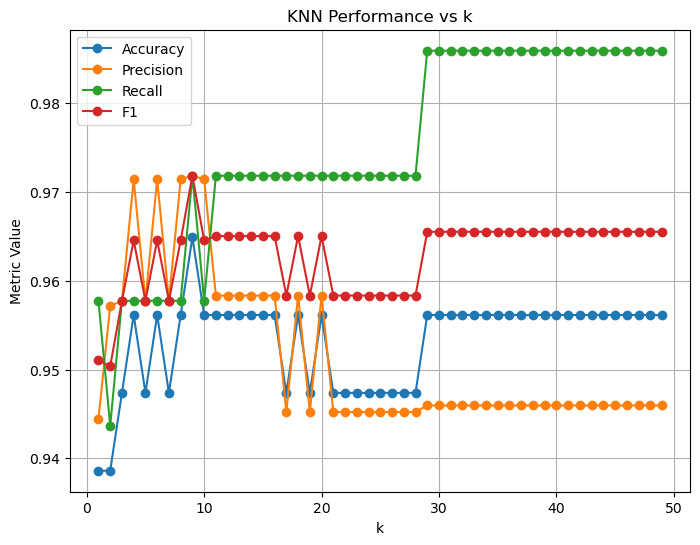

In [81]:
# Extracting different evaluation metrics from the KNN_array
k_values = KNN_array[:, 0] # k values used in the k-NN model
accuracy_vals = KNN_array[:, 1] # Accuracy scores for each k
precision_vals = KNN_array[:, 2] # Precision scores for each k
recall_vals = KNN_array[:, 3] # Recall scores for each k
f1_vals = KNN_array[:, 4] # F1 scores for each k

# Creating a plot to visualize the performance of k-NN for different k values
plt.figure(figsize=(8, 6))

# Plotting accuracy, precision, recall, and F1-score against k values
plt.plot(k_values, accuracy_vals, marker='o', label='Accuracy')
plt.plot(k_values, precision_vals, marker='o', label='Precision')
plt.plot(k_values, recall_vals, marker='o', label='Recall')
plt.plot(k_values, f1_vals, marker='o', label='F1')

# Setting the title and labels
plt.title("KNN Performance vs k")
plt.xlabel("k")
plt.ylabel("Metric Value")
plt.grid(True)
plt.legend()
plt.show()


The performance metrics remain stable for k-values between 8 and 12. Selecting a value within this range can enhance performace metrices.


Let's validate this by evaluating the model with k=9.

In [82]:
# Initializing the k-Nearest Neighbors (k-NN) classifier with k=9
knn=neighbors.KNeighborsClassifier(n_neighbors=9)

# Training the k-NN classifier using the standardized training dataset
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=9)

In [83]:
accuracy, precision, recall, f1, cm=evaluate_model(knn, X_test_scaled, y_test)
print ("KNN")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(cm)

KNN
Accuracy: 0.9649122807017544
Precision: 0.971830985915493
Recall: 0.971830985915493
F1-score: 0.971830985915493
[[41  2]
 [ 2 69]]


In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid_params = { 'n_neighbors' : [10,11,13,15,18,20,25],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [86]:
gs = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [87]:
g_res = gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [88]:
g_res.best_score_

0.9625740676193796

In [89]:
best_parameters=g_res.best_params_

In [90]:
knn = neighbors.KNeighborsClassifier(n_neighbors = best_parameters['n_neighbors'], weights = best_parameters['weights'], metric = best_parameters['metric'])
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [91]:
accuracy, precision, recall, f1, cm=evaluate_model(knn, X_test_scaled, y_test)
# Displaying the evaluation results
print ("KNN with Hyperparameter Tuning")
print(f"Accuracy: {accuracy:.4f}")     # Overall correctness of the model
print(f"Precision: {precision:.4f}")   # Correctly predicted positive instances out of all predicted positives
print(f"Recall: {recall:.4f}")         # Correctly predicted positives out of actual positives
print(f"F1-score: {f1:.4f}")           # Harmonic mean of Precision and Recall
print("Confusion Matrix:")
print(cm)                              # Confusion matrix showing correct and incorrect predictions


#Adding the data in dictionary we created in the beginning
add_results("KNN", "Yes", accuracy, precision, recall, f1)

KNN with Hyperparameter Tuning
Accuracy: 0.9561
Precision: 0.9583
Recall: 0.9718
F1-score: 0.9650
Confusion Matrix:
[[40  3]
 [ 2 69]]


In [92]:
from sklearn.metrics import classification_report

# Making predictions on the test dataset using the trained k-NN model
y_predict=knn.predict(X_test_scaled)

# Generating the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [93]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the k-NN model
scores = cross_val_score(knn, X, y, cv =5)

# Printing the average model accuracy across all folds
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9279614966620089


**Decision Tree**

The following code initializes and trains a Decision Tree classifier.

In [94]:
# Initializing the Decision Tree Classifier with a fixed random state for reproducibility
decision_tree=tree.DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model using the standardized training dataset
decision_tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [95]:
# Evaluating the trained Decision Tree classifier on the test dataset
accuracy, precision, recall, f1, cm=evaluate_model(decision_tree, X_test_scaled, y_test)
# Displaying the evaluation results
print ("Decision Tree without Hyperparameter Tuning")
print(f"Accuracy: {accuracy:.4f}")     # Overall correctness of the model
print(f"Precision: {precision:.4f}")   # Correctly predicted positive instances out of all predicted positives
print(f"Recall: {recall:.4f}")         # Correctly predicted positives out of actual positives
print(f"F1-score: {f1:.4f}")           # Harmonic mean of Precision and Recall
print("Confusion Matrix:")
print(cm)                              # Confusion matrix showing correct and incorrect predictions

add_results("Decision Tree", "No", accuracy, precision, recall, f1)

Decision Tree without Hyperparameter Tuning
Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
F1-score: 0.9577
Confusion Matrix:
[[40  3]
 [ 3 68]]


*Hyperparameter tuning*


Decision Trees are sensitive to data splits and can produce different results based on the random_state value.  
To assess how stable the model is, we train Decision Trees with different random states (1 to 49) and evaluate their performance.

In [96]:
# Initializing an empty list to store Decision Tree evaluation results
decisiontree_array=[]

# Looping through different values of random_state (from 1 to 49) to analyze model stability
for i in range(1, 50):
    # Initializing a Decision Tree classifier with varying random_state values
    decisiontree = tree.DecisionTreeClassifier(random_state=i)
    # Training the model using the standardized training dataset
    decision_tree.fit(X_train_scaled, y_train)
    # Evaluating the model on the test dataset
    acc, prec, rec, f1, cm = evaluate_model(decision_tree, X_test_scaled, y_test)
    # Storing the results in a list
    decisiontree_array.append((i, acc, prec, rec, f1))
    
# Converting the list into a NumPy array 
decisiontree_array=np.array(decisiontree_array)
# print(decisiontree_array)
# decisiontree_array.shape

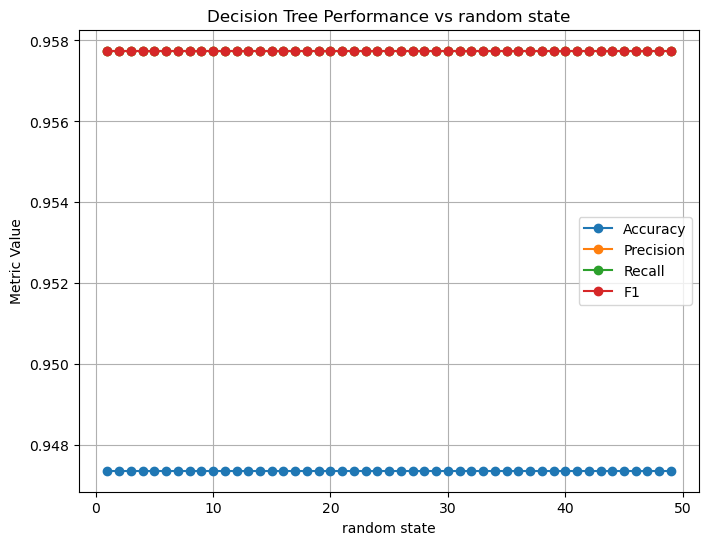

In [97]:
# Extracting different evaluation metrics from the decisiontree_array
d_values = decisiontree_array[:, 0]
accuracy_vals = decisiontree_array[:, 1]
precision_vals = decisiontree_array[:, 2]
recall_vals = decisiontree_array[:, 3]
f1_vals = decisiontree_array[:, 4]

# Creating a plot to visualize the performance of the Decision Tree for different random states
plt.figure(figsize=(8, 6))

# Plotting accuracy, precision, recall, and F1-score against random state values
plt.plot(d_values, accuracy_vals, marker='o', label='Accuracy')
plt.plot(d_values, precision_vals, marker='o', label='Precision')
plt.plot(d_values, recall_vals, marker='o', label='Recall')
plt.plot(d_values, f1_vals, marker='o', label='F1')

# Setting the title and labels
plt.title("Decision Tree Performance vs random state")
plt.xlabel("random state")
plt.ylabel("Metric Value")
plt.grid(True)
plt.legend()
plt.show()

Let's perform hyperparameter tuning by optimizing the maximum depth (max_depth), minimum samples split (min_samples_split), and splitting criterion (criterion), using both Gini impurity and Entropy

In [98]:
#Defining hyperparameter values to explore
criteria = ['gini', 'entropy'] # Setting criteria for splitting
results = [] #List to store model evaluation 

#Iterating through different hyperparameter values
for depth in range (1,100): #Testing tree depths from 1 to 100
    for split in range (2,100): #Testing minimum samples split from 2 to 100
        for crit in criteria: #Iterating through 'gini' and 'entropy'
            # Training the Decision Tree with specific hyperparameters
            dt = tree.DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                criterion=crit,
                random_state=42
            )
            # Performing Cross-Validation with 5 folds using F1-score as the metric
            scores = cross_val_score(dt, X, y, cv=5, scoring='f1')
            f1_mean=scores.mean()
            f1_std= scores.std()

            # Training the model on the full training dataset
            dt.fit(X_train_scaled, y_train)
            
            
            # Evaluating the model on the test dataset
            acc, pred, rec, f1_val, cm = evaluate_model(decision_tree,X_test_scaled, y_test)
            
            # Storing results in a structured format
            results.append({
                'max_depth': depth,
                'min_samples_split': split,
                'criterion': crit,
                'cv_mean_f1':f1_mean,
                'cv_std_f1':f1_std,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1': f1_val
            })

# Converting to a DataFrame for easy analysis
results_df = pd.DataFrame(results)
print(results_df.head())


   max_depth  min_samples_split criterion  cv_mean_f1  cv_std_f1  Accuracy  \
0          1                  2      gini    0.922848   0.010738  0.947368   
1          1                  2   entropy    0.925359   0.011227  0.947368   
2          1                  3      gini    0.922848   0.010738  0.947368   
3          1                  3   entropy    0.925359   0.011227  0.947368   
4          1                  4      gini    0.922848   0.010738  0.947368   

   Precision    Recall        F1  
0   0.957746  0.957746  0.957746  
1   0.957746  0.957746  0.957746  
2   0.957746  0.957746  0.957746  
3   0.957746  0.957746  0.957746  
4   0.957746  0.957746  0.957746  


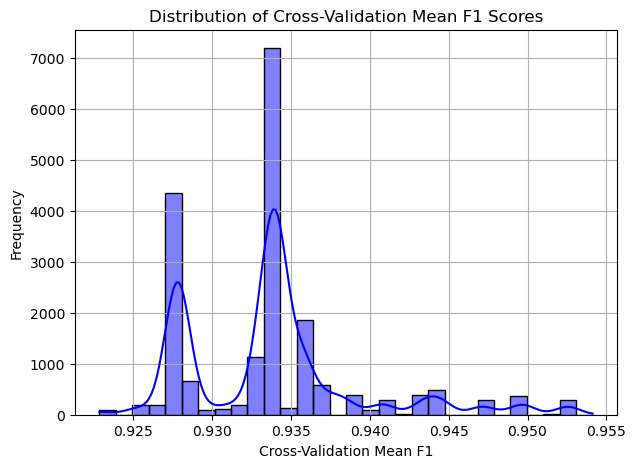

In [99]:
# Creating a histogram to visualize the distribution of cross-validation mean F1 scores
plt.figure(figsize=(7,5))

# Plotting histogram with Kernel Density Estimation (KDE) for smooth distribution curve
sns.histplot(results_df['cv_mean_f1'], bins=30, kde=True, color='blue')

# Setting the title and labels
plt.title("Distribution of Cross-Validation Mean F1 Scores")
plt.xlabel("Cross-Validation Mean F1")
plt.ylabel("Frequency")

plt.grid(True)
plt.show()


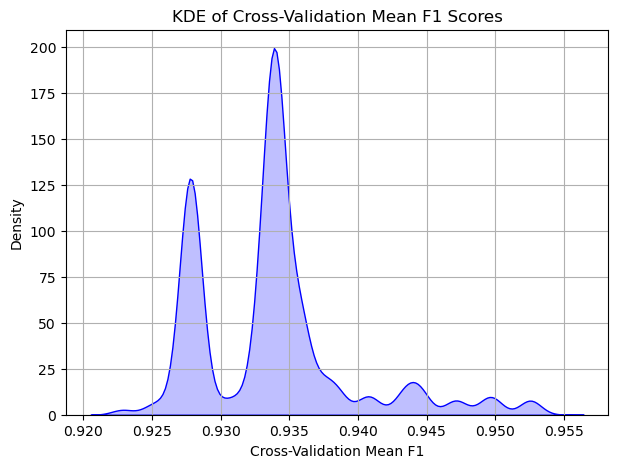

In [100]:
# Creating a Kernel Density Estimation (KDE) plot to visualize the distribution of F1 scores
plt.figure(figsize=(7,5))

# Plotting the KDE curve with filled color to enhance visualization
sns.kdeplot(results_df['cv_mean_f1'], fill=True, color='blue')

# Setting the title and axis labels
plt.title("KDE of Cross-Validation Mean F1 Scores")
plt.xlabel("Cross-Validation Mean F1")

# Enabling grid for better readability
plt.grid(True)

# Displaying the plot
plt.show()


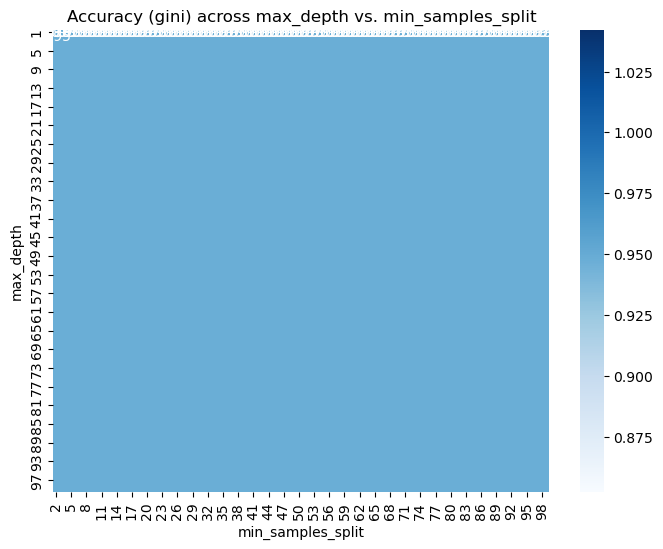

In [101]:
# Filtering the dataframe for one criterion, e.g. 'gini'
df_gini = results_df[results_df['criterion'] == 'gini']

# Creating a pivot table: rows = max_depth, columns = min_samples_split, values = Accuracy
pivot_acc_gini = df_gini.pivot(index='max_depth', 
                               columns='min_samples_split', 
                               values='Accuracy')

# Ploting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_acc_gini, annot=True, cmap='Blues')
plt.title("Accuracy (gini) across max_depth vs. min_samples_split")
plt.ylabel("max_depth")
plt.xlabel("min_samples_split")
plt.show()


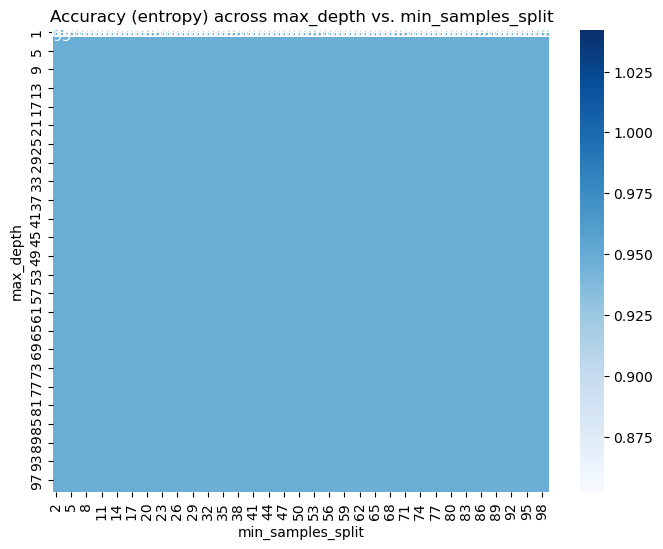

In [102]:
# Filter the dataframe for one criterion, e.g. 'gini'
df_entropy = results_df[results_df['criterion'] == 'entropy']

# Create a pivot table: rows = max_depth, columns = min_samples_split, values = Accuracy
pivot_acc_entropy = df_entropy.pivot(index='max_depth', 
                               columns='min_samples_split', 
                               values='Accuracy')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_acc_entropy, annot=True, cmap='Blues')
plt.title("Accuracy (entropy) across max_depth vs. min_samples_split")
plt.ylabel("max_depth")
plt.xlabel("min_samples_split")
plt.show()


Instead of performing all these, implementing GridSearchCV for hyperparameter optimization is easier to systematically explore and identify the best combination of parameters for the Decision Tree Classifier.

In [103]:
# Defining scoring metrics for evaluation
scorers = {
    'accuracy': 'accuracy',  # Standard accuracy metric
    'precision': make_scorer(precision_score),  # Precision metric
    'recall': make_scorer(recall_score),  # Recall metric
    'f1': make_scorer(f1_score)  # F1-score metric (harmonic mean of precision and recall)
}

# Defining the hyperparameter grid
parameter = {
    'max_depth': range(1, 51),  # Exploring tree depths from 1 to 50
    'min_samples_split': range(2, 51),  # Minimum samples required for a split (2 to 50)
    'criterion': ['gini', 'entropy']  # Splitting criteria options
}

# Initializing the Decision Tree model
dt = tree.DecisionTreeClassifier(random_state=42)

# Setting up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt,  # Decision Tree as base model
    param_grid=parameter,  # Hyperparameter grid
    scoring=scorers,  # Dictionary of scoring metrics
    refit='f1',  # Selecting the best model based on F1-score
    cv=5,  # Using 5-fold cross-validation
    verbose=1,  # Displaying progress updates
    n_jobs=-1,  # Utilizing all available CPU cores for parallel computation
    error_score='raise'  # Raising errors instead of ignoring them
)

# Fitting GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Displaying the best hyperparameters and the corresponding best F1-score
best_parameter=grid_search.best_params_
print("Best Params:", grid_search.best_params_)
print("Best F1-score (CV) =", grid_search.best_score_)

# Converting cross-validation results into a DataFrame for further analysis
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print(cv_results_df.columns)  # Display available result columns


Fitting 5 folds for each of 4900 candidates, totalling 24500 fits
Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best F1-score (CV) = 0.9579742850582431
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_accuracy', 'split1_test_accuracy',
       'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy',
       'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
       'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_recall', 'split1_test_recall',
       'split2_test_recall', 'split3_test_recall', 'split4_test_recall',
       'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'split0_test_f1', 'split1_test_f1', 'sp

In [104]:
# Initializing the Decision Tree Classifier with optimized hyperparameters
decision_tree = tree.DecisionTreeClassifier(
    max_depth=best_parameter['max_depth'],     # Optimal tree depth to prevent overfitting
    min_samples_split=best_parameter['min_samples_split'],     # Minimum samples required to split an internal node
    criterion=best_parameter['criterion'],     # Using "entropy" for information gain-based splitting
    random_state=42     # Fixed seed for reproducibility
)

# Training the Decision Tree model on the scaled training dataset
decision_tree.fit(X_train_scaled, y_train)

# Evaluating the model on the test dataset
accuracy, precision, recall, f1, cm = evaluate_model(decision_tree, X_test_scaled, y_test)

# Displaying evaluation metrics
print("Decision Tree With Hyperparameter Tuning")
print(f"Accuracy: {accuracy:.4f}")     # Overall correctness of the model
print(f"Precision: {precision:.4f}")   # How many predicted positives are actually positive
print(f"Recall: {recall:.4f}")         # Ability to capture all actual positive cases
print(f"F1-score: {f1:.4f}")           # Harmonic mean of precision and recall
print("Confusion Matrix:")
print(cm)                              # Confusion matrix showing correct and incorrect predictions


Decision Tree With Hyperparameter Tuning
Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
F1-score: 0.9655
Confusion Matrix:
[[39  4]
 [ 1 70]]


In [105]:
# Evaluating Decision Tree with Hyperparameterization
add_results("Decision", "Yes", accuracy, precision, recall, f1)

In [106]:
from sklearn.metrics import classification_report

# Making predictions on the test dataset using the trained k-NN model
y_predict=decision_tree.predict(X_test_scaled)

# Generating the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [107]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the k-NN model
scores = cross_val_score(decision_tree, X, y, cv =5)

# Printing the average model accuracy across all folds
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9332401800962582


**Random Forest**

In [108]:
# Initializing the Random Forest Classifier
random_forest = ensemble.RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42    # Fixed seed for reproducibility
)

# Training the Random Forest model on the standardized training dataset
random_forest.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [109]:
# Evaluating the Random Forest model on the test dataset
accuracy, precision, recall, f1, cm= evaluate_model(random_forest, X_test_scaled, y_test)

# Displaying the model's performance metrics
print("Random Forest Without Hyperparameter Tuning")
print(f"Accuracy: {accuracy:.4f}")     # Overall correctness of the model
print(f"Precision: {precision:.4f}")   # Correctly predicted positive instances out of all predicted positives
print(f"Recall: {recall:.4f}")         # Correctly predicted positives out of actual positives
print(f"F1-score: {f1:.4f}")           # Harmonic mean of Precision and Recall
print("Confusion Matrix:")
print(cm)                              # Confusion matrix showing correct and incorrect predictions

# Evaluating Random Forest without Hyperparameter Tuning
accuracy, precision, recall, f1, _ = evaluate_model(random_forest, X_test_scaled, y_test)
add_results("Random Forest", "No", accuracy, precision, recall, f1)

Random Forest Without Hyperparameter Tuning
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722
Confusion Matrix:
[[40  3]
 [ 1 70]]


*Hyperparameter tuning*

In [110]:
# Initializing an empty list to store Random Forest evaluation results
randomforest_array = []

# Looping through different values of n_estimators (from 1 to 199) to analyze performance
for i in range(1, 200):
    # Initializing a Random Forest classifier with varying number of estimators
    randomforest = ensemble.RandomForestClassifier(n_estimators=i, random_state=42)
    
    # Training the model using the standardized training dataset
    random_forest.fit(X_train_scaled, y_train)
    
    # Evaluating the model on the test dataset
    acc, prec, rec, f1, cm = evaluate_model(random_forest, X_test_scaled, y_test)
    
    # Storing the results in a list (n_estimators, accuracy, precision, recall, F1-score)
    randomforest_array.append((i, acc, prec, rec, f1))

# Converting the list into a NumPy array for easier analysis
randomforest_array = np.array(randomforest_array)

# print(randomforest_array)
# randomforest_array.shape


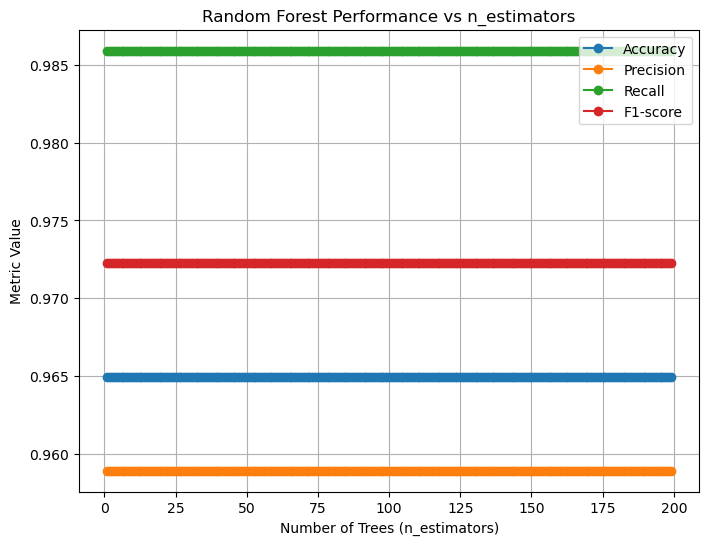

In [111]:
# Extracting different evaluation metrics from the randomforest_array
r_values = randomforest_array[:, 0]        # Number of trees (n_estimators) used in the Random Forest model
accuracy_vals = randomforest_array[:, 1]   # Accuracy scores for each n_estimators value
precision_vals = randomforest_array[:, 2]  # Precision scores for each n_estimators value
recall_vals = randomforest_array[:, 3]     # Recall scores for each n_estimators value
f1_vals = randomforest_array[:, 4]         # F1 scores for each n_estimators value

# Creating a plot to visualize the performance of the Random Forest for different n_estimators values
plt.figure(figsize=(8, 6))

# Plotting accuracy, precision, recall, and F1-score against the number of trees
plt.plot(r_values, accuracy_vals, marker='o', label='Accuracy')
plt.plot(r_values, precision_vals, marker='o', label='Precision')
plt.plot(r_values, recall_vals, marker='o', label='Recall')
plt.plot(r_values, f1_vals, marker='o', label='F1-score')

# Setting the title and axis labels
plt.title("Random Forest Performance vs n_estimators")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Metric Value")


plt.grid(True)
plt.legend()
plt.show()

Let's use GridSearchCV

In [112]:
# Importing RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Defining the range of hyperparameters for Random Forest tuning

# Number of trees in the forest, selected from a range of 200 to 2000 with 10 evenly spaced values
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Number of features to consider at each split
max_features = ['log2', 'sqrt']

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 4]

# Maximum depth of the trees, selected from a range of 10 to 110 with 11 evenly spaced values
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)  # Allow unlimited depth as an option

# Bootstrapping technique for sampling (with or without replacement)
bootstrap = [True, False]

# Creating the dictionary of hyperparameter options for RandomizedSearchCV
random_grid = {
    'n_estimators': n_estimators,   # Varying the number of trees
    'max_features': max_features,   # Varying the number of features considered at each split
    'max_depth': max_depth,         # Varying the depth of trees
    'min_samples_split': min_samples_split,   # Controlling tree growth by requiring a minimum number of samples to split a node
    'min_samples_leaf': min_samples_leaf,     # Controlling leaf size to prevent overfitting
    'bootstrap': bootstrap          # Experimenting with bootstrapping techniques
}

# Displaying the generated hyperparameter grid
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [113]:
# Initializing a base Random Forest classifier
rf = ensemble.RandomForestClassifier()

# Setting up RandomizedSearchCV to optimize hyperparameters
rf_random = RandomizedSearchCV(
    estimator=rf,  # Base Random Forest model
    param_distributions=random_grid,  # Predefined hyperparameter grid
    n_iter=100,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=0,  # Suppress detailed logs
    random_state=42,  # Fixed seed for reproducibility
    n_jobs=-1,  # Utilize all available CPU cores
    scoring='f1'  # Optimize for F1-score
)

# Fitting RandomizedSearchCV to the test dataset
rf_random.fit(X_test_scaled, y_test)

# Converting cross-validation results into a DataFrame for analysis
results_df = pd.DataFrame(rf_random.cv_results_)

# Iterating through hyperparameters and visualizing their impact on F1-score
for param in random_grid.keys():
    col_name = f"param_{param}"  # cv_results_ stores hyperparameters with 'param_' prefix
    plt.figure(figsize=(8, 6))

    # Checking if the parameter is numeric or categorical
    if pd.api.types.is_numeric_dtype(results_df[col_name]):
        # For numeric parameters, use a line plot
        sns.lineplot(x=col_name, y='mean_test_score', data=results_df, marker='o')
    else:
        # For categorical parameters, use a box plot
        sns.boxplot(x=col_name, y='mean_test_score', data=results_df)

    # Setting plot labels and title
    plt.xlabel(param)
    plt.ylabel("Mean Test Score (F1)")
    plt.title(f"Mean Test Score vs. {param}")

    # Saving the plot as an image
    filename = f"MeanTestScore_vs_{param}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Closing the plot to free memory
    plt.close()

In [114]:
# Extracting the best hyperparameters identified by RandomizedSearchCV
best_parameters = rf_random.best_params_

# Displaying the optimal hyperparameter values
print("Best Hyperparameters for Random Forest:", best_parameters)


Best Hyperparameters for Random Forest: {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [115]:
# Initializing the Random Forest Classifier with the best hyperparameters from RandomizedSearchCV
random_forest = ensemble.RandomForestClassifier(
    n_estimators=best_parameters['n_estimators'],        # Optimal number of trees
    max_features=best_parameters['max_features'],        # Optimal number of features per split
    max_depth=best_parameters['max_depth'],              # Optimal tree depth
    min_samples_split=best_parameters['min_samples_split'],  # Minimum samples required for a split
    min_samples_leaf=best_parameters['min_samples_leaf'],    # Minimum samples required at a leaf node
    bootstrap=best_parameters['bootstrap'],              # Bootstrap sampling method
    random_state=42  # Fixed seed for reproducibility
)

# Training the optimized Random Forest model on the full training dataset
random_forest.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1600,
                       random_state=42)

In [116]:
train_accuracy = evaluate_model(random_forest, X_train_scaled, y_train)[0]  # Accuracy on training set
test_accuracy = evaluate_model(random_forest, X_test_scaled, y_test)[0]  # Accuracy on test set

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.1:  # 10% difference is a common threshold
    print("Overfitting detected: Model performs much better on training data than test data.")


Training Accuracy: 0.9890
Test Accuracy: 0.9649


In [117]:
train_accuracy = evaluate_model(random_forest, X_train_scaled, y_train)[0]  # Accuracy on training set
test_accuracy = evaluate_model(random_forest, X_test_scaled, y_test)[0]  # Accuracy on test set

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy - test_accuracy > 0.1:  # 10% difference is a common threshold
    print("Overfitting detected: Model performs much better on training data than test data.")


Training Accuracy: 0.9890
Test Accuracy: 0.9649


In [118]:
# Evaluating the Random Forest model on the test dataset
randomforest_report = evaluate_model(random_forest, X_test_scaled, y_test)

# Displaying the model's performance metrics
print("Random Forest With Hyperparameter Tuning")
print(f"Accuracy: {accuracy:.4f}")     # Overall correctness of the model
print(f"Precision: {precision:.4f}")   # Correctly predicted positive instances out of all predicted positives
print(f"Recall: {recall:.4f}")         # Correctly predicted positives out of actual positives
print(f"F1-score: {f1:.4f}")           # Harmonic mean of Precision and Recall
print("Confusion Matrix:")
print(cm)                              # Confusion matrix showing correct and incorrect predictions

# Evaluating Random Forest with Hyperparameter Tuning
accuracy, precision, recall, f1, _ = evaluate_model(random_forest, X_test_scaled, y_test)
add_results("Random Forest", "No", accuracy, precision, recall, f1)

Random Forest With Hyperparameter Tuning
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1-score: 0.9722
Confusion Matrix:
[[40  3]
 [ 1 70]]


In [119]:
from sklearn.metrics import classification_report

# Making predictions on the test dataset using the trained k-NN model
y_predict=decision_tree.predict(X_test_scaled)

# Generating the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [120]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the k-NN model
scores = cross_val_score(random_forest, X, y, cv =5)

# Printing the average model accuracy across all folds
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.95960254618848


In [124]:
#Looking at the final data stored in results
# Convert dictionary to DataFrame
# df_results_overall = pd.DataFrame(results_overall)
df_results_overall

# # Display the table
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=df_results)


,Model,Hyperparameterization,Accuracy,Precision,Recall,F1-score
0,KNN,No,0.947368,0.957746,0.957746,0.957746
1,KNN,Yes,0.956140,0.958333,0.971831,0.965035
2,Decision Tree,No,0.947368,0.957746,0.957746,0.957746
3,Decision,Yes,0.956140,0.945946,0.985915,0.965517
4,Random Forest,No,0.964912,0.958904,0.985915,0.972222
5,Random Forest,No,0.964912,0.958904,0.985915,0.972222
